In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest   #ricordali di toglierli nel caso non servono 
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(0)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Loding data and Data Preparation

In [2]:
train = pd.read_csv("Data/train.csv")
train.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.650511,1.158653,0.580172,2.230388,3.179675,0.533686,0.440101,5.033898,0.200985,1.589221,...,0.047287,0.337121,0.203356,0.191360,0.590874,0.112145,0.110109,0.160637,1.329248,t-CS-m
1,0.365907,0.651296,0.810468,2.597217,4.131603,0.537554,0.249235,6.099538,0.226362,1.700578,...,0.521112,0.419544,0.231619,0.393897,0.252572,0.352687,0.085545,0.328537,1.008023,t-SC-s
2,0.260145,0.397996,0.229522,2.643311,4.303648,0.268394,0.050916,3.130455,0.273792,2.534531,...,0.047407,0.053130,0.096325,0.257402,0.246015,0.203979,0.039188,0.008315,1.193634,c-SC-s
3,0.239489,0.271240,0.766816,1.872419,2.424971,0.322269,0.386791,2.351832,0.034265,0.472725,...,0.273651,0.162382,0.234056,0.180657,0.351388,0.103896,0.302341,0.166020,0.689970,c-CS-m
4,0.617112,0.751737,0.050685,2.356175,3.494138,0.506875,0.310644,3.855825,0.309879,1.033428,...,0.172488,0.014086,0.191145,0.149622,0.310434,0.151685,0.180055,0.383039,1.737274,t-CS-s


In [3]:
# STA COSA E' DA CAPIRE PERCHé NON MI è TROPPO CHIARA
# pd.get_dummies(train[['class']]) 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         367 non-null    float64
 1   ITSN1_N          367 non-null    float64
 2   BDNF_N           367 non-null    float64
 3   NR1_N            367 non-null    float64
 4   NR2A_N           367 non-null    float64
 5   pAKT_N           367 non-null    float64
 6   pBRAF_N          367 non-null    float64
 7   pCAMKII_N        367 non-null    float64
 8   pCREB_N          367 non-null    float64
 9   pELK_N           367 non-null    float64
 10  pERK_N           367 non-null    float64
 11  pJNK_N           367 non-null    float64
 12  PKCA_N           367 non-null    float64
 13  pMEK_N           367 non-null    float64
 14  pNR1_N           367 non-null    float64
 15  pNR2A_N          367 non-null    float64
 16  pNR2B_N          367 non-null    float64
 17  pPKCAB_N        

## Preliminary Analysis 

### Data visualizzation 
In order to have an idea of our data, we can plot them to see if they are correleted. We can think of using the pairplot to show how each feature is correlated to the other but this is impossible due to the high number of features. We can instead, to begin with, plotting the correlation matrix. And then tray to reduce the number of features.

As we can see using the correlation matrix the features are moderately correlated.

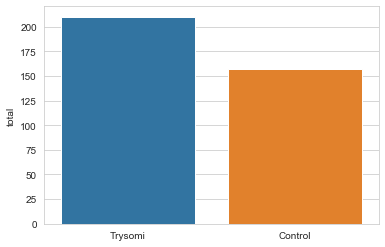

In [5]:
#plotting the number of mouse divided in 'control' and 'trisomy'
trysomi = train['class'].str.contains("t-")
control = train['class'].str.contains("c-")

trysomi_vs_control = pd.DataFrame({'Trysomi':[sum(trysomi)], 'Control':[sum(control)]}, index = ['total']).T
sns.barplot(x = ['Trysomi', 'Control'], y = "total", data = trysomi_vs_control)

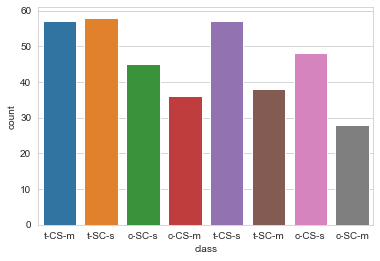

In [6]:
# number of samples the 8 classes
sns.countplot(train['class'], )

## Class Labels

In [7]:
labelClass = train['class'] # the class column
le = preprocessing.LabelEncoder()
codedLabel = le.fit_transform(labelClass)  # fitta il trasformatore e mi ritorna le label 
train['class']  = le.fit_transform(train['class'])
train


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.650511,1.158653,0.580172,2.230388,3.179675,0.533686,0.440101,5.033898,0.200985,1.589221,...,0.047287,0.337121,0.203356,0.191360,0.590874,0.112145,0.110109,0.160637,1.329248,4
1,0.365907,0.651296,0.810468,2.597217,4.131603,0.537554,0.249235,6.099538,0.226362,1.700578,...,0.521112,0.419544,0.231619,0.393897,0.252572,0.352687,0.085545,0.328537,1.008023,7
2,0.260145,0.397996,0.229522,2.643311,4.303648,0.268394,0.050916,3.130455,0.273792,2.534531,...,0.047407,0.053130,0.096325,0.257402,0.246015,0.203979,0.039188,0.008315,1.193634,3
3,0.239489,0.271240,0.766816,1.872419,2.424971,0.322269,0.386791,2.351832,0.034265,0.472725,...,0.273651,0.162382,0.234056,0.180657,0.351388,0.103896,0.302341,0.166020,0.689970,0
4,0.617112,0.751737,0.050685,2.356175,3.494138,0.506875,0.310644,3.855825,0.309879,1.033428,...,0.172488,0.014086,0.191145,0.149622,0.310434,0.151685,0.180055,0.383039,1.737274,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.265617,0.318703,0.062552,2.190572,3.028526,0.314935,0.293579,5.647761,0.194538,1.293860,...,0.281070,0.169755,0.070476,0.246973,0.420950,0.144801,0.198893,0.198080,1.132259,2
363,0.371998,0.683835,0.088809,2.264053,3.901498,0.308142,0.256376,4.628201,0.045254,1.405705,...,0.380423,0.346237,0.256601,0.158367,0.139080,0.422385,0.115629,0.389457,1.104580,2
364,0.853106,1.048825,0.422033,2.037549,3.480993,0.402487,0.125134,2.216711,0.116000,2.158211,...,0.364075,0.099125,0.040736,0.530906,0.379040,0.046529,0.075847,0.068273,1.243315,4
365,0.523508,0.846670,0.777588,2.493568,4.117986,0.229136,0.193073,2.650853,0.001629,1.536754,...,0.220932,0.191266,0.049275,0.063009,0.541193,0.335438,0.218873,0.081170,1.161350,5


In [8]:
def visualizeCorrMat(data): # Create correlation matrixc
    plt.figure(figsize = (11, 9))
    sns.heatmap(data, cmap = plt.cm.Reds)
    #versione bella
    #f, ax = plt.subplots(figsize = (11, 9))
    #mask = np.triu(np.ones_like(data, dtype = np.bool))
    #cmap = sns.diverging_palette(220, 10, as_cmap = True)
    #sns.heatmap(data, mask = mask, cmap = cmap, vmax = 1, center = 0,
    #        square = True, linewidths = .9, cbar_kws = {"shrink": .5})
    


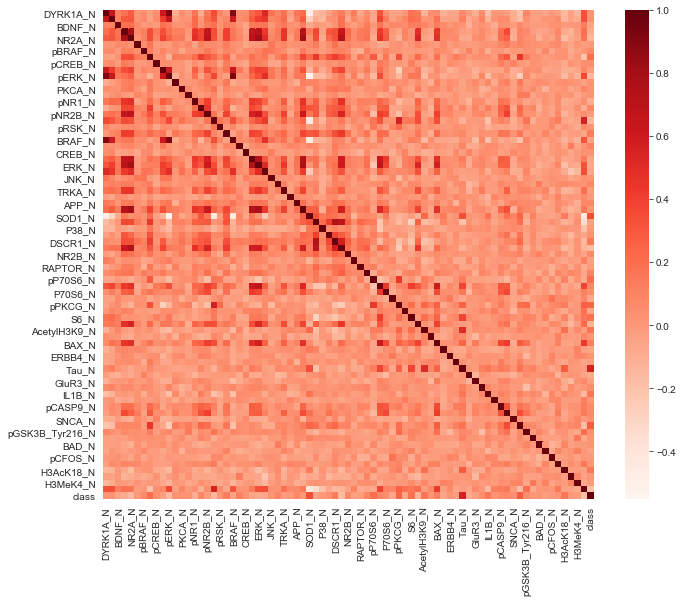

In [9]:
corrMat = train.corr()
visualizeCorrMat(corrMat)

Only six features have a correlation greater that 0.2 in particular only SOD1_N has a correlation of 0.351115 and Tau_N has a correlation of 0.554868.

In [10]:
# Correlation with the output variable
cor_target = abs(corrMat['class']).drop('class')
# Selecting the highly correlated features
relevant_features_2 = cor_target[cor_target > 0.2]
relevant_features_2.index

Index(['pCAMKII_N', 'SOD1_N', 'pP70S6_N', 'pPKCG_N', 'Tau_N', 'Ubiquitin_N'], dtype='object')

In [11]:
# we drop the target class
train = train.drop(columns = 'class', axis = 1)
# drop the SOD1_N
features_SOD1_N = train['SOD1_N']
train = train.drop(columns = 'SOD1_N', axis = 1)

## Variance visualizzation
In ordert to understand our daset we show the variance among the features, it is always a good practice to analyze the variance to understand if our data need normalization. In our particolar in our dataset presentslots of features with low variance e some features with high variance.

Max Variance value :	 1.926769317467468
Min Variance value :	 0.00040275706051909544
Mean Variance value:	 0.09757634594471151


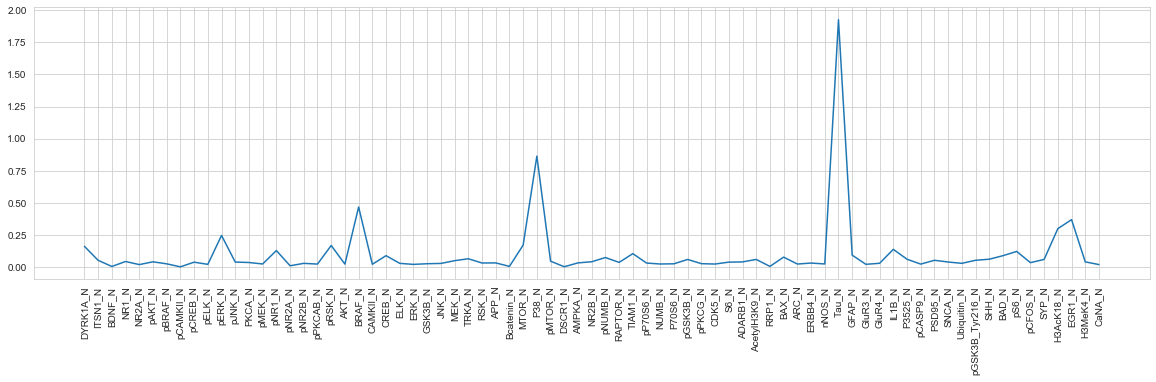

In [12]:
def varianceVisualization(data):
    print("Max Variance value :\t", data.var().max())
    print("Min Variance value :\t", data.var().min())
    print("Mean Variance value:\t", data.var().mean())
    plt.subplots(figsize = (20, 5))
    plot = sns.lineplot(x = data.var().index, y = data.var().values)
    plot.set_xticklabels(data,rotation = 90)
   # plt.figure(figsize = (25, 6))
    #plt.xticks(rotation = 90)
    #plt.plot(data.var())
    
varianceVisualization(train)

## Data normalization 
In order to deal with this problem we perform a data normalizaion, using the min_max_scaler

Max Variance value :	 1.0027322404371597
Min Variance value :	 1.0027322404371575
Mean Variance value:	 1.0027322404371581


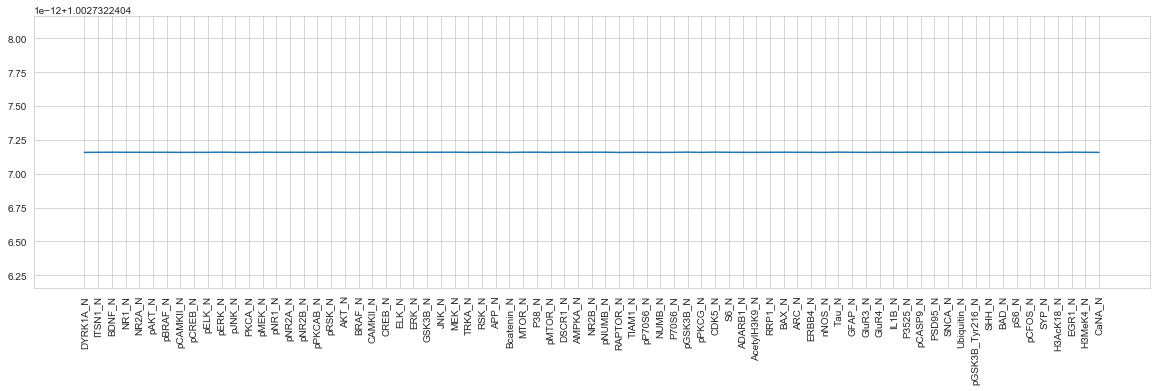

In [13]:
standard_scaler = preprocessing.StandardScaler().fit(train)
train = pd.DataFrame(standard_scaler.transform(train), columns = train.columns)
varianceVisualization(train)


We can now visualize the PCs to have a look of the number of dimension we need to separate our data. Let's calculate the PCs and visualize the persentage of variance expressed by each component

In [14]:
def principalComponent(data, n_comp): # compute PC and % variation expressed by the PCs
    #scaled_Train = scale(train.drop(['class'], axis = 1))
    pca = PCA(n_comp) 
    return pca.fit_transform(data), np.round(100 * pca.explained_variance_ratio_, decimals = 2), pca.singular_values_

def visualizeComponentVariance(data, ylab, title, cum = False):
    plot_labels = ['PC' + str(s) for s in range(1, len(data) + 1)]
    plt.figure(figsize = (44, 10))
    if(cum == True):
        colormat = np.where(data > 90, '#ff7f0e','#1f77b4')
    else:
         colormat = np.where(per_var < 1, '#ff7f0e','#1f77b4')
    plt.bar(x = range(1, len(data) + 1), height = data, tick_label = plot_labels, color = colormat)
    #plt.hlines(y = 90, xmin = 1, xmax = len(cum_var) + 1)
    plt.ylabel(ylab, size = 30)
    plt.xlabel('Principal Component', size = 30)
    plt.xticks(rotation = 45, size = 25)
    plt.yticks(size = 25)
    plt.title(title, size = 40)
    plt.show()
    return plot_labels

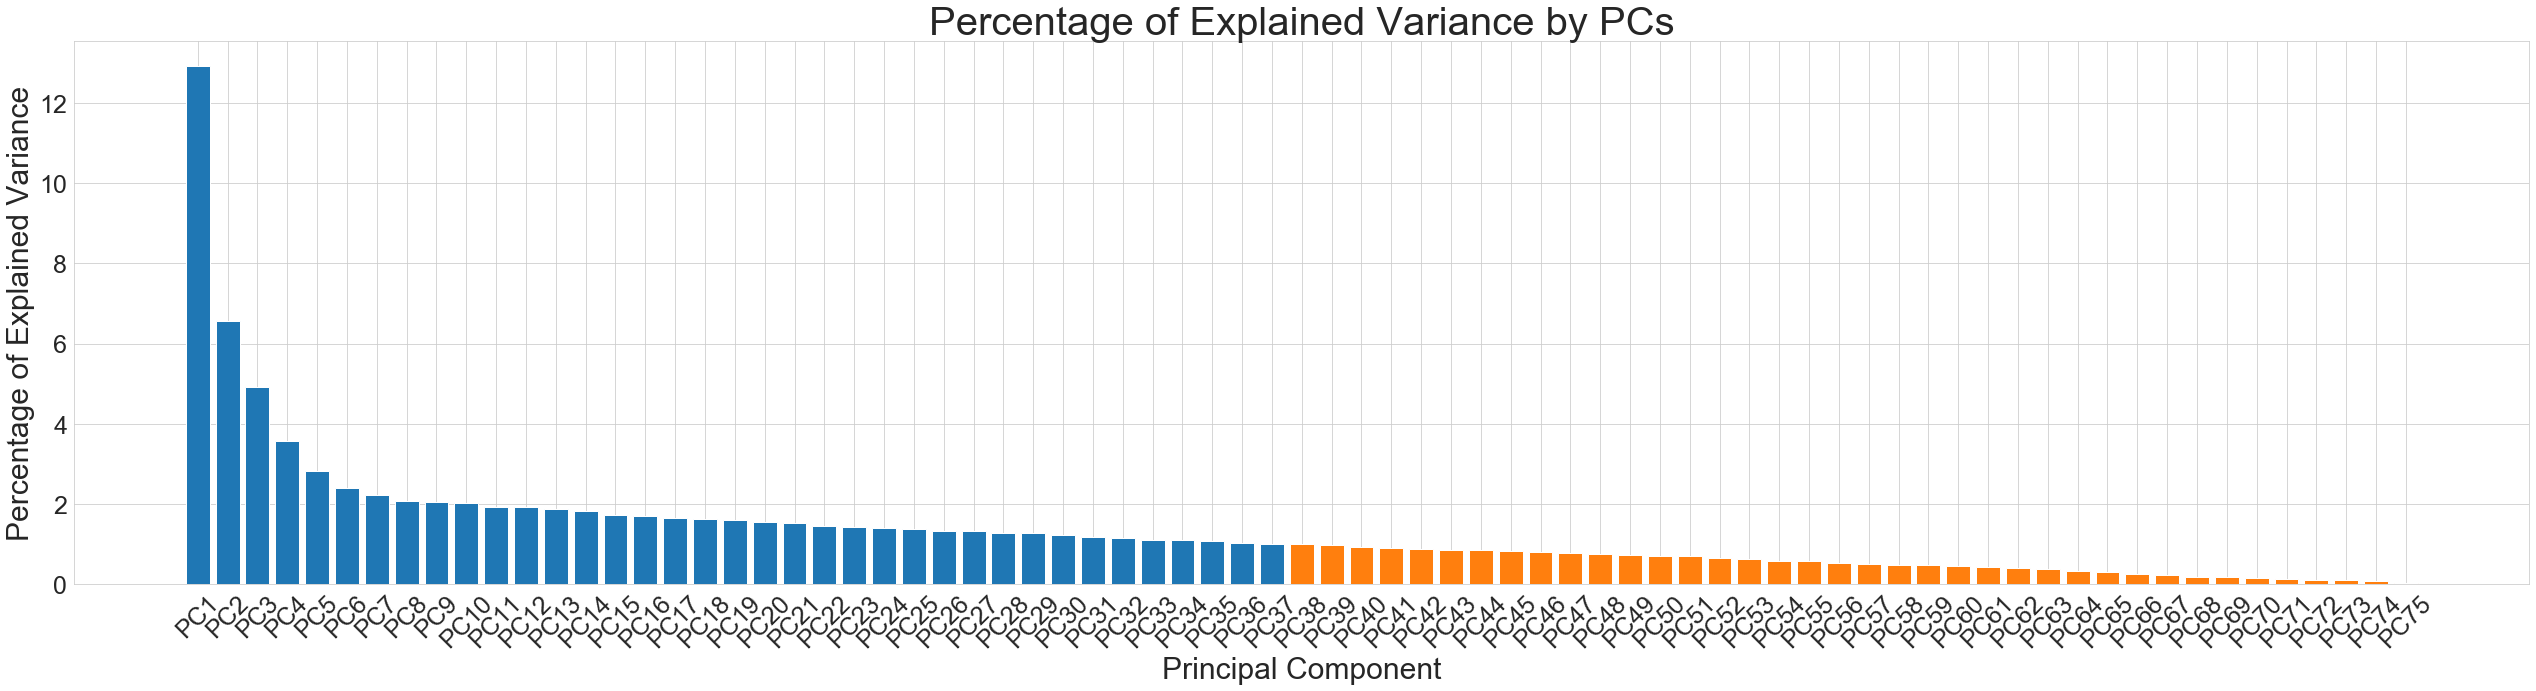

In [15]:
principalComp, per_var, singular_values = principalComponent(train, min(train.shape))
plot_labels = visualizeComponentVariance(per_var, 'Percentage of Explained Variance', 'Percentage of Explained Variance by PCs')

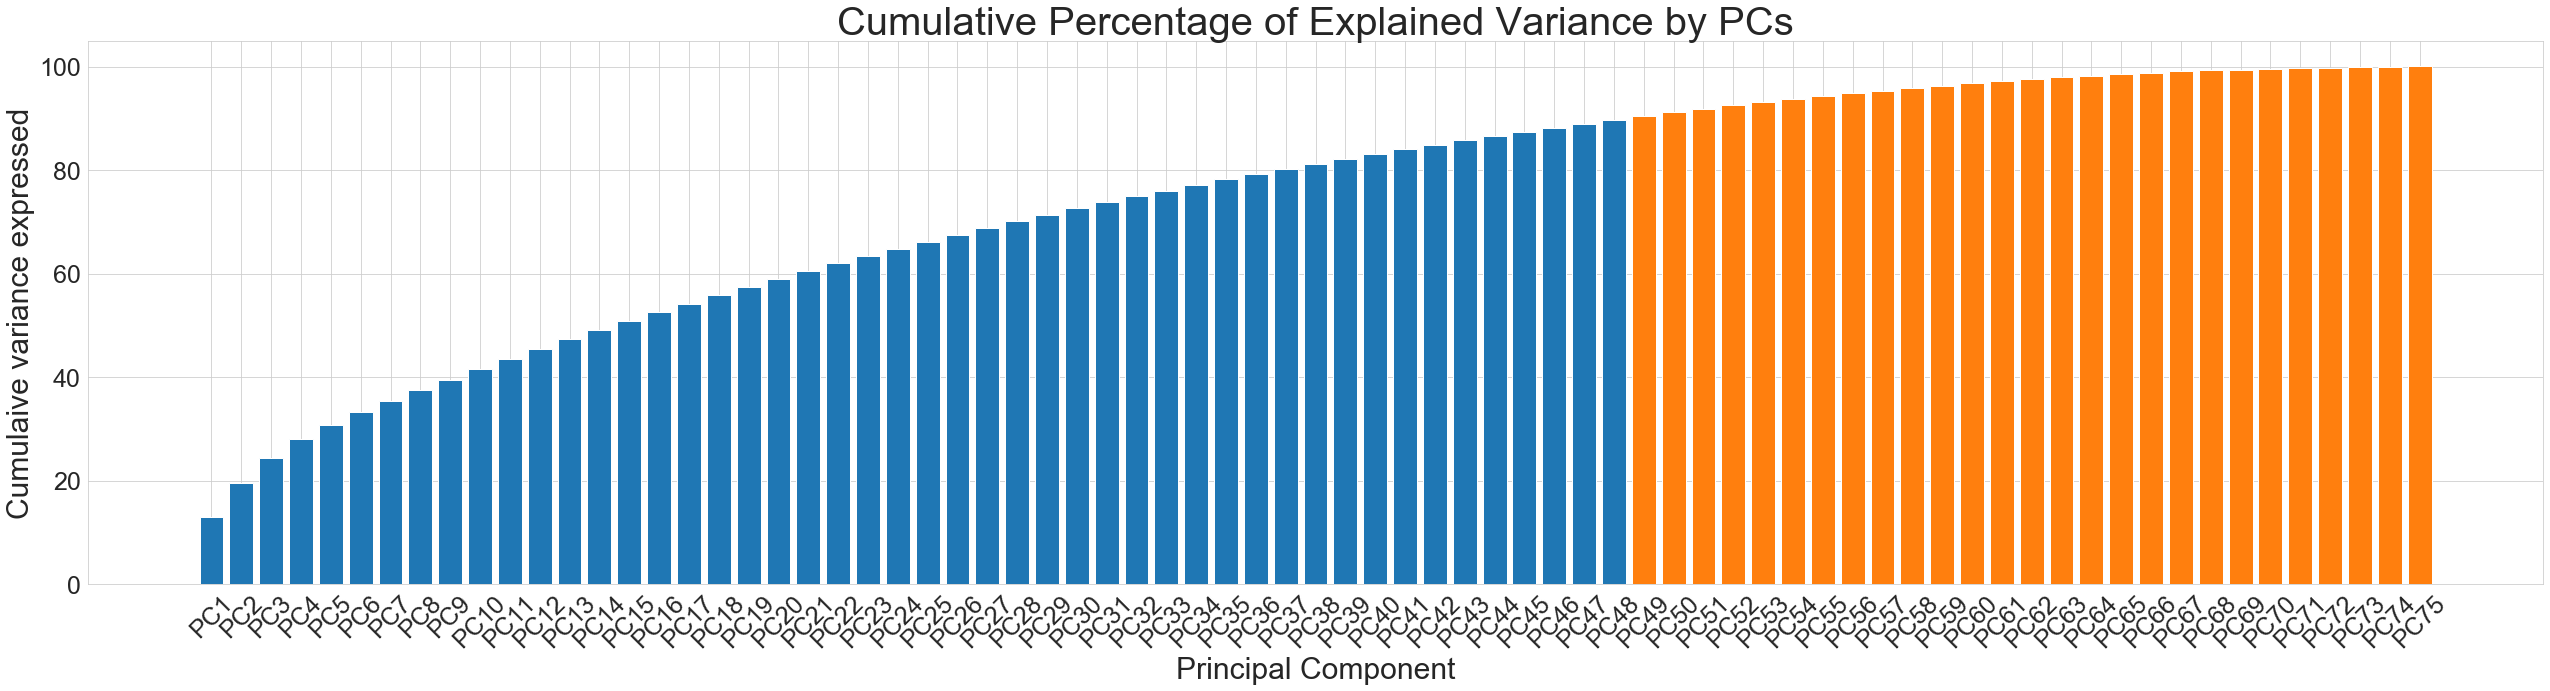

In [16]:
_ = visualizeComponentVariance(per_var.cumsum(), 'Cumulaive variance expressed', 
                           'Cumulative Percentage of Explained Variance by PCs', True)

We can see that the percentage of variance expressed by each orincipal component is much and only with 48 PCs we reach a cumulative variance expressed equal to the 90%. Let's have a look to a plot using the first 3 PCs. This will shows that with only 3 PCs we can't perfectly separate the data.

In [17]:
def plotPCA(Label, pc, **label_):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(111, projection = '3d')
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', nlabels)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), 
                                                      unique_labelClass.max() + 1),   cmap = cmap)
    ax.scatter(xs = pc.PC1, ys = pc.PC2, zs = pc.PC3, marker = '.', s = 200, 
               c = Label, cmap = cmap)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    cbar = plt.colorbar(mappable = smap, label = 'Label')
    
def plot2dPCA(Label, pc1, pc2):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', 8)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), 
                                                      unique_labelClass.max() + 1),cmap = cmap)
    plt.scatter(x = pc1, y = pc2, marker = '.', s = 200, c = Label, cmap = cmap)
    plt.colorbar(mappable = smap, label = 'Label')

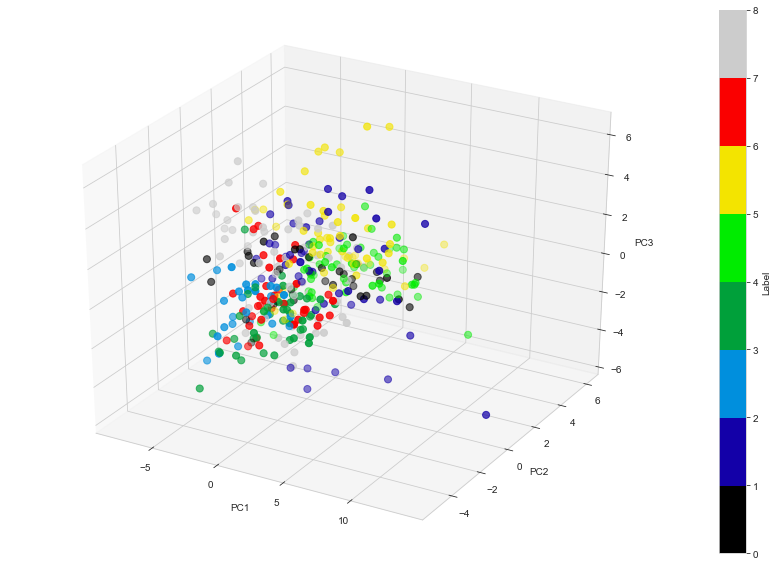

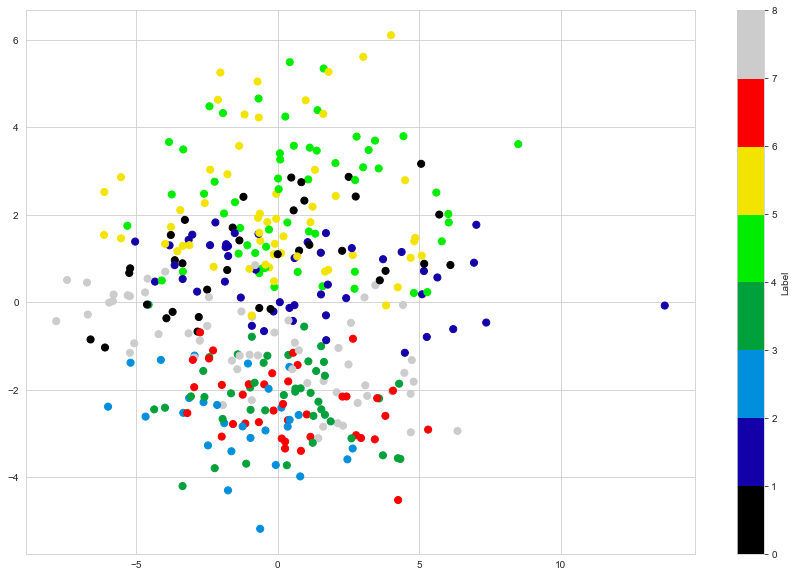

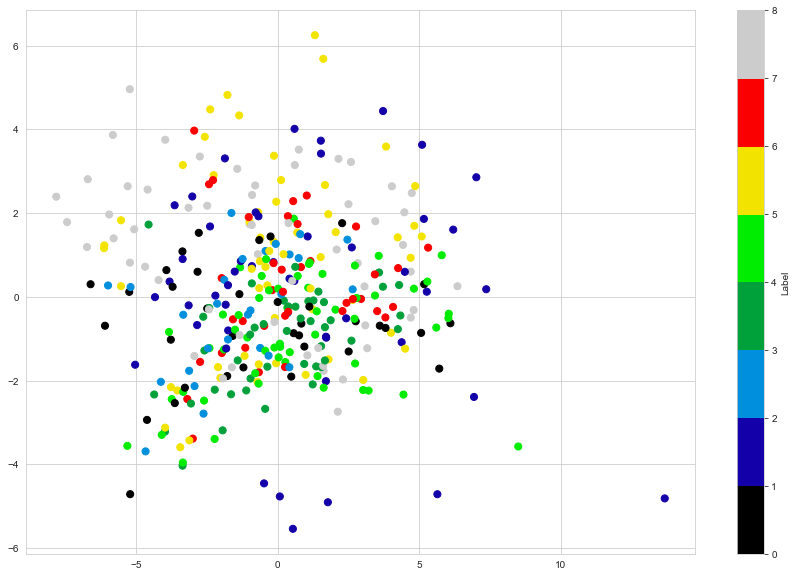

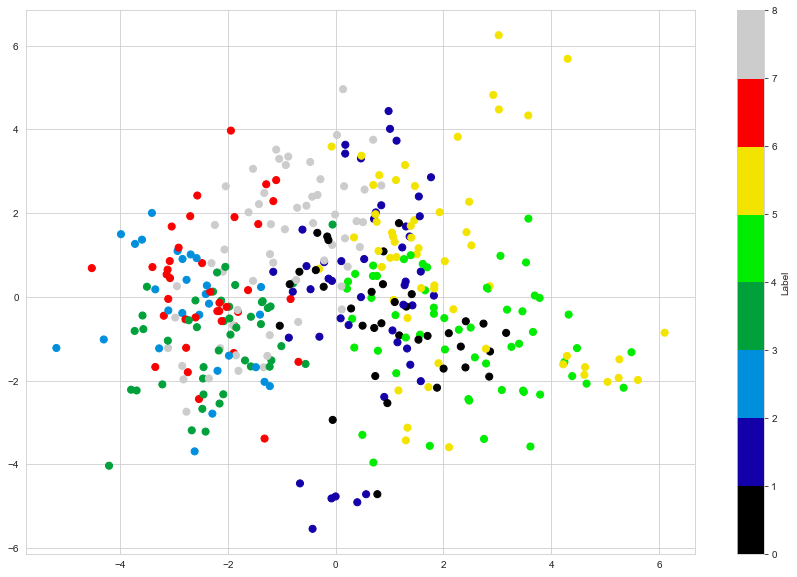

In [18]:
#per ora ho ignorato " _ " la percentuale di varianza espressa e i singular values
pc_plot, _, _ = principalComponent(train, 3)
pc_plot = pd.DataFrame(pc_plot, columns = plot_labels[0 : 3])

plotPCA(codedLabel, pc_plot)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC2)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC3)
plot2dPCA(codedLabel, pc_plot.PC2, pc_plot.PC3)

## Features Selection

# QUI TOLGO SOLO QUELLE CON CORRELAZIONE ALTA.. MA ME NE TROVA SOLO 2 QUINDI NON MOLTO UTILE....
#visualizeCorrMat(corrMat_selected)
# Select upper triangle of correlation matrix
upper = corrMat.where(np.triu(np.ones(corrMat.shape), k = 1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.78
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.60)]
to_drop
train.


In [19]:
# Drop features 
#train = train.drop(train[to_drop], axis = 1)
train.shape
#sns.pairplot(train_x)

(367, 75)

In [20]:
X_new = SelectKBest(chi2, k = 5).fit_transform(abs(train), codedLabel)

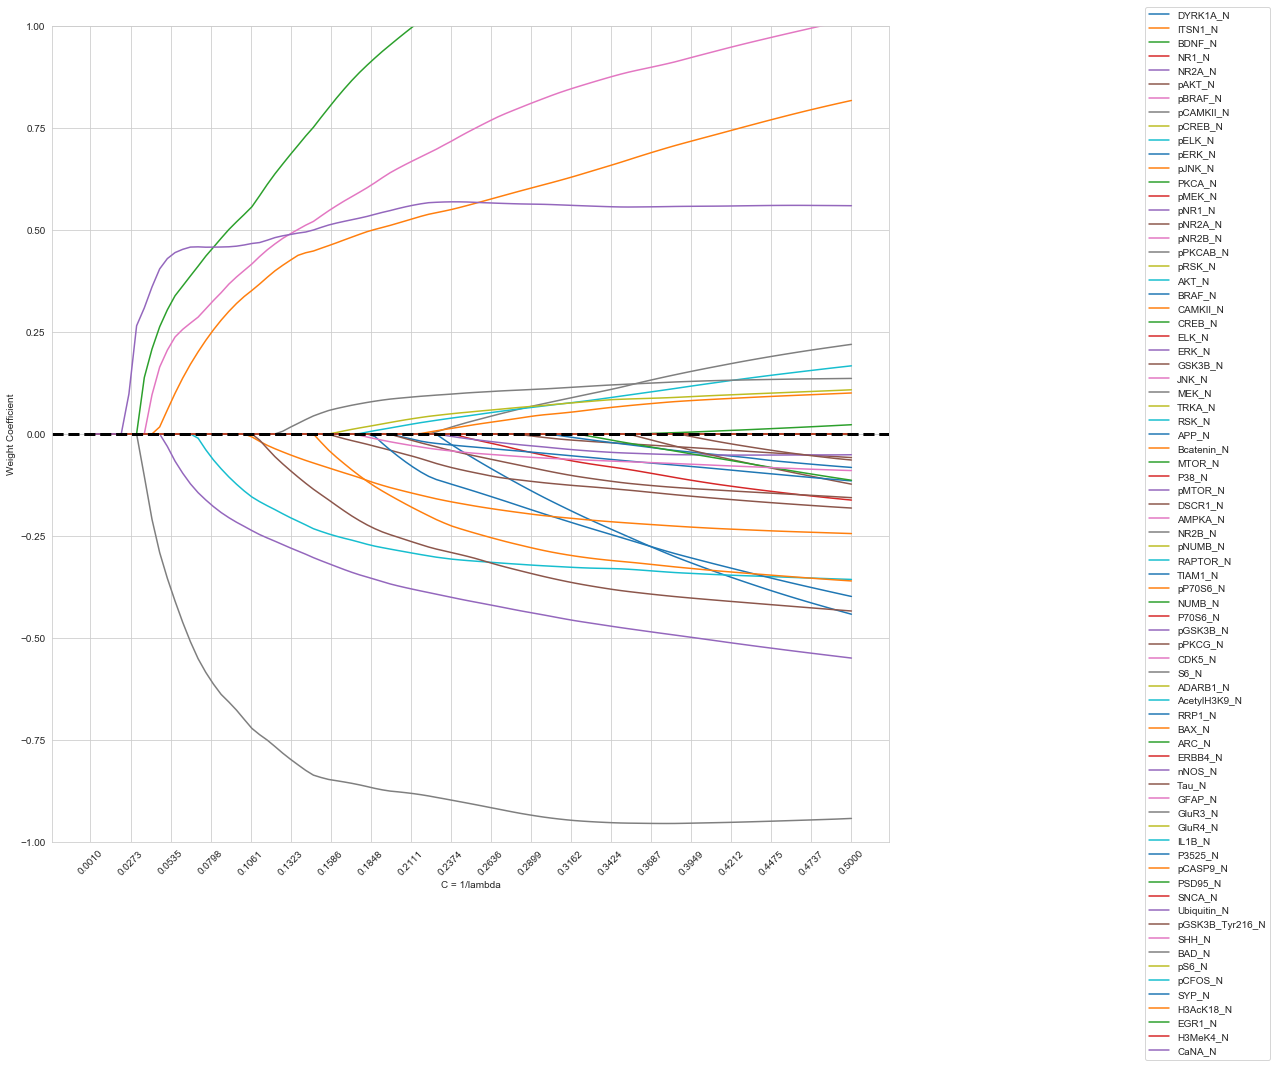

In [21]:
#LASSO
def visualizeLasso():
    fig = plt.figure(figsize = (15, 15))  
    ax = plt.subplot(111)
    colors = sns.color_palette(None, 77)
    weights, params = [], []
    for c in np.linspace(0.001, .5, 100):
        lr = LogisticRegression(penalty = 'l1',solver = 'saga', C = c, random_state = 0)
        lr.fit(train, codedLabel)
        weights.append(lr.coef_[1])
        params.append(c)

    weights = np.array(weights)
    for colmun, color in zip(range(weights.shape[1]), colors):
        plt.plot(params, weights[:, colmun],
                label = train.columns[colmun],
                color = color)
    plt.axhline(0, color ='black', linestyle = '--', linewidth = 3)
    x_ticks = np.linspace(0.001, .5, 20)      #(0.001, 0.2, 20)
    plt.xticks(x_ticks, rotation = 45)
    plt.ylabel('Weight Coefficient')
    plt.xlabel("C = 1/lambda")
    #plt.xscale('log')
    plt.ylim((-1, 1)) 
    plt.legend(loc = 'upper left')
    ax.legend(loc ='upper center',
             bbox_to_anchor =(1.38, 1.03),
             ncol = 1, fancybox = True)

    plt.show()



visualizeLasso()
    

Optimal number of features : 11


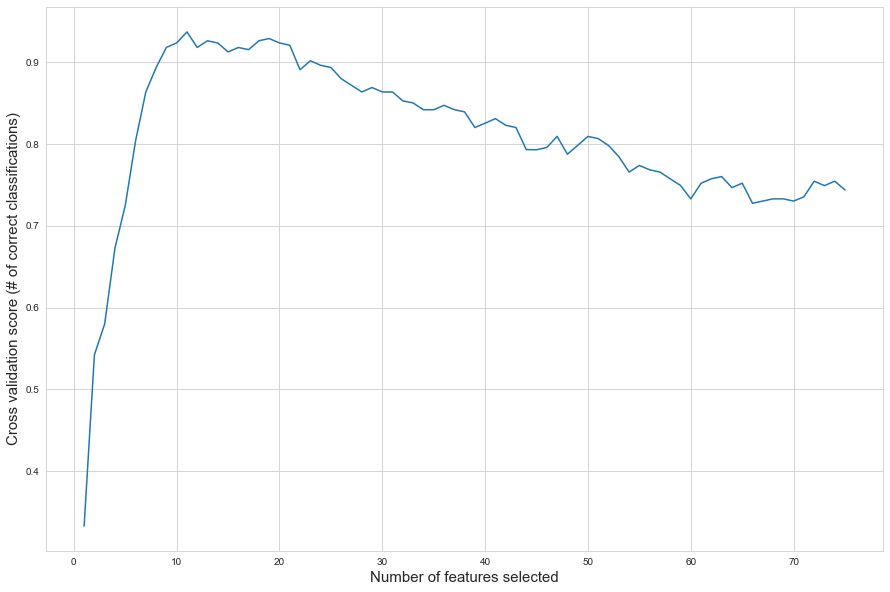

In [22]:
def selectFeatures(X, y):
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel = "linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator = svc, step = 1, cv = StratifiedKFold(10),
                  scoring = 'accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize = (15, 10))
    plt.xlabel("Number of features selected", size = 15)
    plt.ylabel("Cross validation score (# of correct classifications)",  size = 15)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    return rfecv

rfecv = selectFeatures(train, codedLabel)

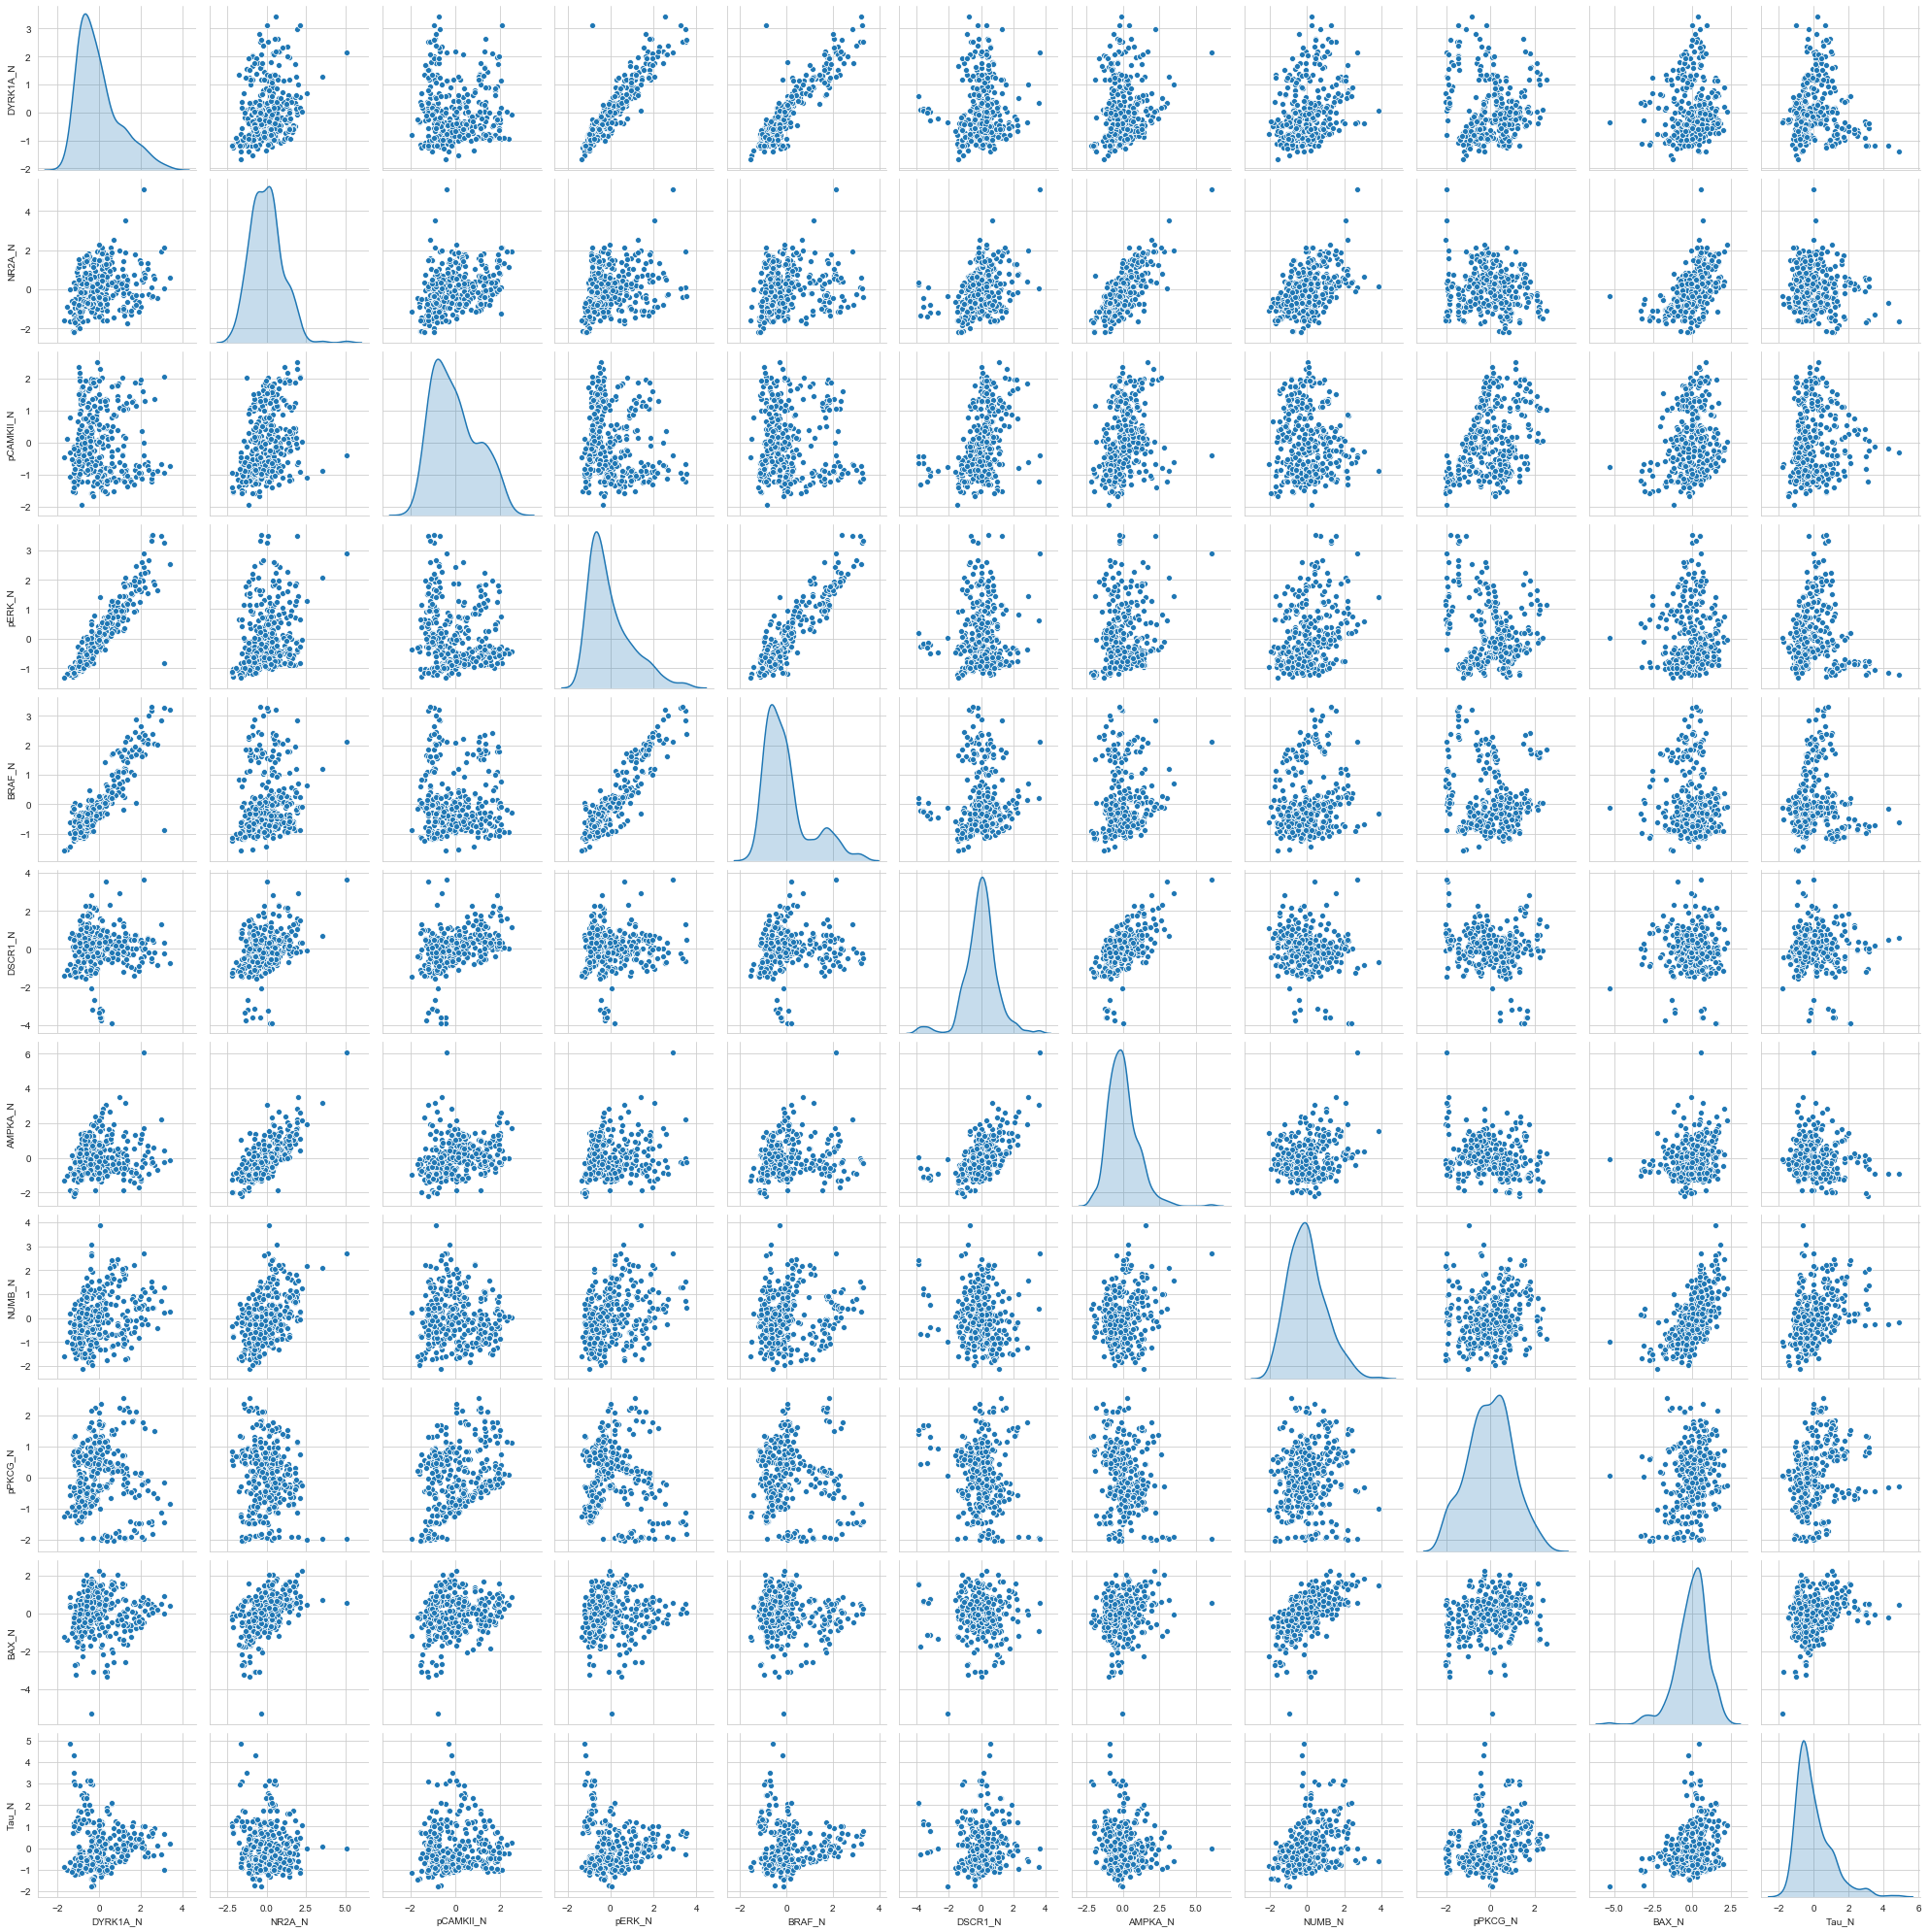

In [23]:
selectedTrain = train[train.columns[rfecv.get_support()]]
sns.pairplot(selectedTrain, diag_kind = "kde")

# Classification

In [24]:
train_x, validation_x, train_y, validation_y = train_test_split(selectedTrain, codedLabel, 
                                                                test_size = 0.20)
print("Shape if train : ", train_x.shape)
print("Shape if train label : ",train_y.shape)
print("Shape if validation : ",validation_x.shape)
print("Shape if validation label : ",validation_y.shape)

Shape if train :  (293, 11)
Shape if train label :  (293,)
Shape if validation :  (74, 11)
Shape if validation label :  (74,)


In [25]:
#model selection 


classifiers = {"Nearest 5Neighbors": KNeighborsClassifier(5), 
               "Logistic Regression" : LogisticRegression(),
               "LDA":  LDA(), "QDA": QDA(), "SVM linear": SVC(kernel = "linear")}

modelScore = {}

for name, model in classifiers.items():
    print("Name: ", name)
    score = cross_val_score(model, train_x, train_y, scoring = 'accuracy', cv = 10)
    #print("List of scores : ", score, "\n")
    print("Mean Score: ", score.mean(), "\n")
    modelScore = {name : score.mean()}
    modelScore.update(modelScore)
    

Name:  Nearest 5Neighbors
Mean Score:  0.8295402298850576 

Name:  Logistic Regression
Mean Score:  0.8768965517241378 

Name:  LDA
Mean Score:  0.8329885057471265 

Name:  QDA
Mean Score:  0.9385057471264368 

Name:  SVM linear
Mean Score:  0.9181609195402298 



In [26]:
param_gridQDA = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]

gridSerarchQDA = GridSearchCV(QDA(), param_grid = param_gridQDA, 
                              return_train_score = True, 
                              cv = 10, n_jobs=-1).fit(train_x, train_y)
bestModelQDA = gridSerarchQDA.best_estimator_
cross_val_score(bestModelQDA, selectedTrain, codedLabel, scoring = 'accuracy', cv = 10).mean()



param_gridSVM = {'C': [0.1, 1, 10, 100, 1000],  
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                 'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
                 'shrinking' : [True, False],
                 'degree': range(1, 4)} 
            
gridSerarchSVM = GridSearchCV(SVC(probability = True), 
                              param_grid = param_gridSVM, 
                              return_train_score = True, 
                              cv = 10, n_jobs=-1).fit(train_x, train_y)



bestModelSVM = gridSerarchSVM.best_estimator_
cross_val_score(bestModelSVM, selectedTrain, codedLabel, scoring = 'accuracy', cv = 10).mean()


0.9428678678678679

0.9645645645645645

In [27]:
test = pd.read_csv("Data/test.csv")
test['class']  = le.fit_transform(test['class'])
coded_y = test['class']
test = test.drop(columns = ['class'], axis = 1)
test = pd.DataFrame(standard_scaler.transform(test), columns = test.columns)
test = test[train.columns[rfecv.get_support()]]
test.head()

,DYRK1A_N,NR2A_N,pCAMKII_N,pERK_N,BRAF_N,DSCR1_N,AMPKA_N,NUMB_N,pPKCG_N,BAX_N,Tau_N
0,-1.483693,-0.482341,0.685066,-1.096109,-1.477174,-0.914329,-0.715807,-0.887245,-0.980583,-0.565501,-1.000838
1,-0.800832,0.909533,0.006090,-0.813230,-0.555945,-0.179249,0.481072,0.281605,-0.631516,0.415084,-0.658263
2,1.173152,0.093866,0.984848,1.292872,1.819541,-0.916902,-0.156067,-0.699485,0.188994,-0.544938,-0.181360
3,-0.414899,-0.017894,-0.237780,-0.826456,-0.763414,-0.119895,-0.456987,1.607719,0.918099,0.430499,3.387084
4,-1.310183,-0.770235,-0.784725,-1.036229,-1.038126,-1.448562,-1.696489,-0.202110,-1.140365,0.966150,-0.471976


In [28]:
bestModelQDA.fit(selectedTrain, codedLabel)
bestModelSVM.fit(selectedTrain, codedLabel)

print('\n\n')
print('Test score : ', np.round(bestModelQDA.score(test, coded_y), decimals = 2))
print('Test score: ', np.round(bestModelSVM.score(test, coded_y), decimals = 2))




QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1,
                              store_covariance=False, tol=0.0001)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)




Test score :  0.96
Test score:  0.99


In [29]:
print(classification_report(coded_y, bestModelSVM.predict(test), target_names = set(labelClass)))

              precision    recall  f1-score   support

      c-SC-s       1.00      1.00      1.00        24
      c-CS-m       1.00      1.00      1.00        27
      t-SC-m       1.00      0.91      0.95        32
      c-SC-m       0.97      1.00      0.98        30
      t-CS-s       1.00      1.00      1.00        33
      t-SC-s       1.00      1.00      1.00        33
      t-CS-m       0.96      1.00      0.98        22
      c-CS-s       0.98      1.00      0.99        44

    accuracy                           0.99       245
   macro avg       0.99      0.99      0.99       245
weighted avg       0.99      0.99      0.99       245



(8, 8)

Confusion matrix Train


Confusion matrix TEST


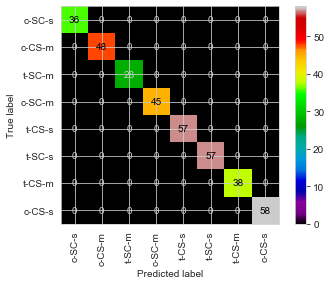

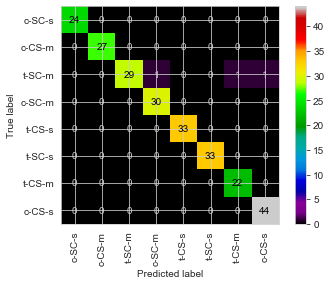

In [30]:
cm = confusion_matrix(coded_y, bestModelSVM.predict(test))
cm.shape
print('Confusion matrix Train')
plot_confusion_matrix(bestModelSVM, selectedTrain, codedLabel, 
                      display_labels = set(labelClass), xticks_rotation='90', cmap = 'nipy_spectral' )
print('Confusion matrix TEST')
plot_confusion_matrix(bestModelSVM, test, coded_y, 
                      display_labels=set(labelClass), xticks_rotation='90', cmap = 'nipy_spectral')

In [31]:

# DEVO VEDERE COME FARE LA COSA DELLA ROC CURVE



def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:, -1])
    # Plot the ROC
    plt.plot(fprs, tprs, label = "ROC " + label)
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()
    
#plot_roc(bestModelSVM.predict_proba, selectedTrain, codedLabel, "SVM Train", )
#plot_roc(bestModelSVM.predict_proba, test, coded_y, "SVM Test")

## Regression 

In [32]:
trainRG = pd.read_csv("Data/train.csv").drop(columns = 'class', axis = 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
#data normalization standard
#scaler = StandardScaler().fit(trainRG)
#trainRG = pd.DataFrame(scaler.transform(trainRG), columns = trainRG.columns)

#data normalization MinMax
#scaler = MinMaxScaler().fit(trainRG)
#trainRG = pd.DataFrame(scaler.transform(trainRG), columns = trainRG.columns)

#data normalization robust_scale
scaler = RobustScaler().fit(trainRG)
trainRG = pd.DataFrame(scaler.transform(trainRG), columns = trainRG.columns)

#y = trainRG['SOD1_N']
print('Inizial shape of train: ', trainRG.shape)

Inizial shape of train:  (367, 76)


(367, 76)

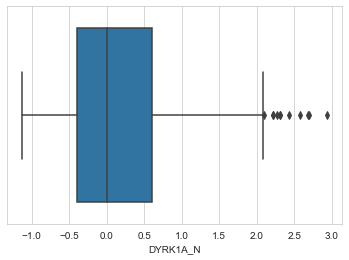

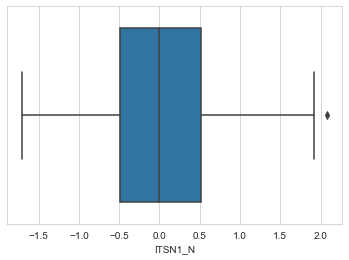

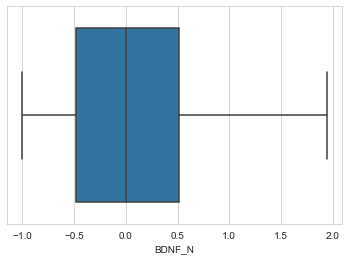

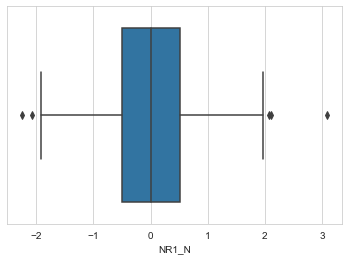

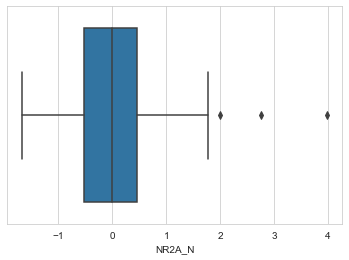

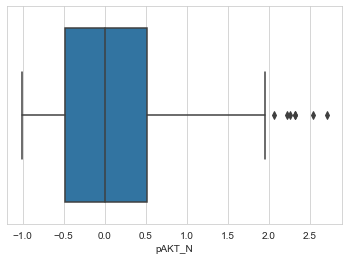

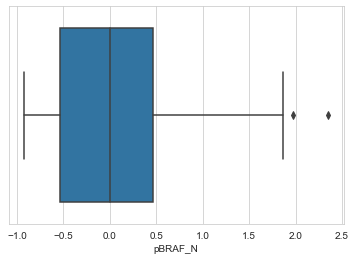

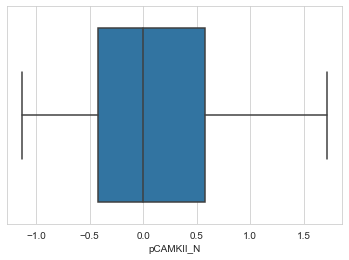

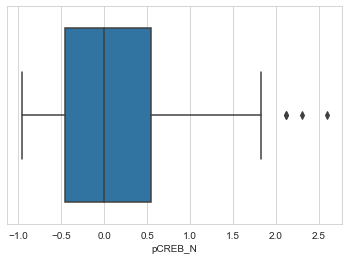

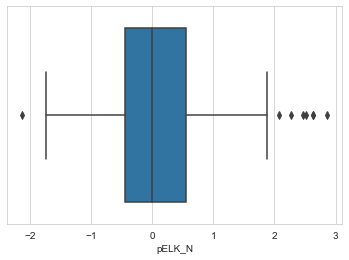

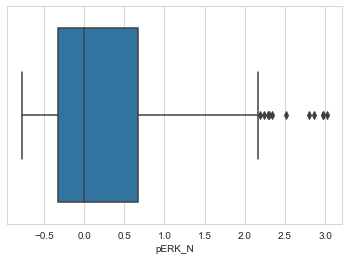

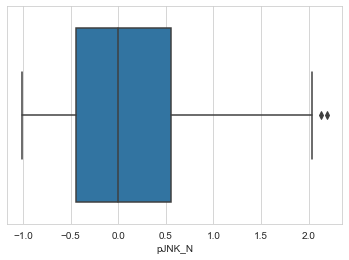

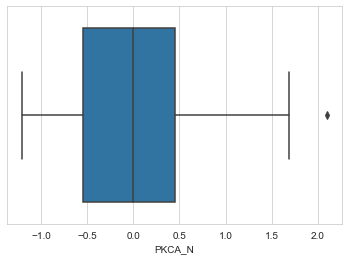

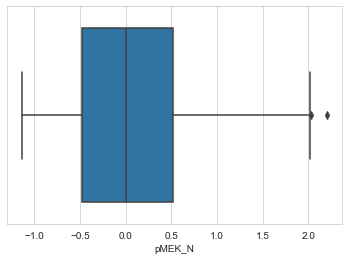

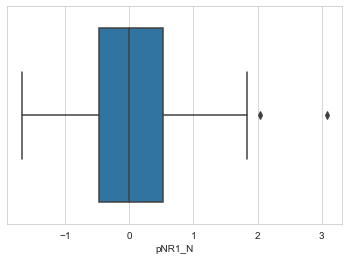

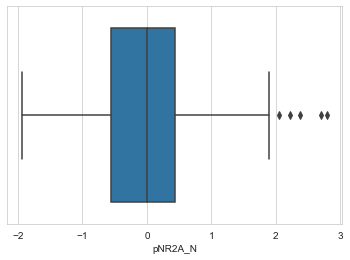

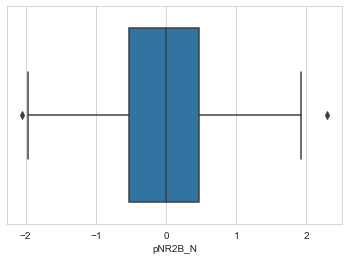

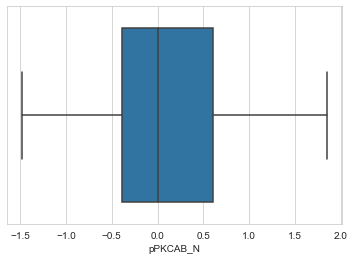

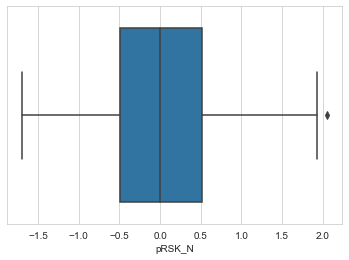

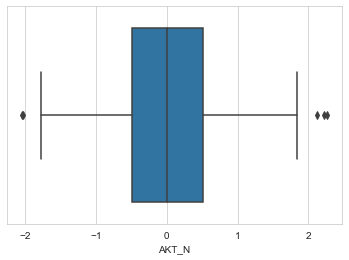

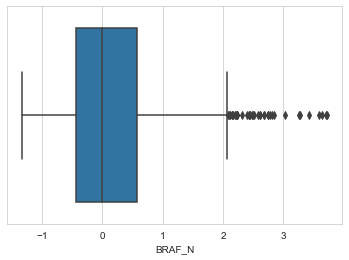

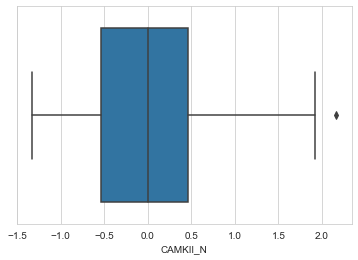

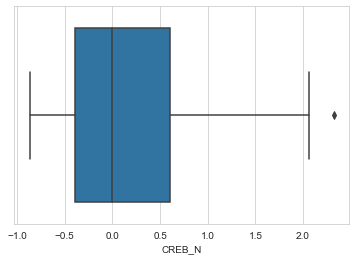

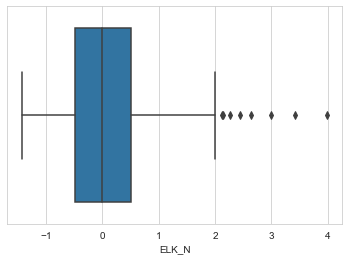

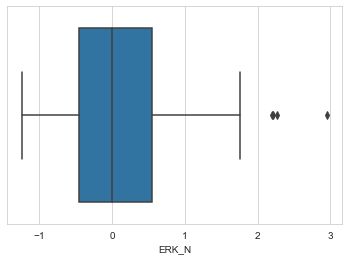

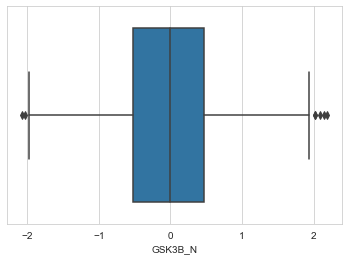

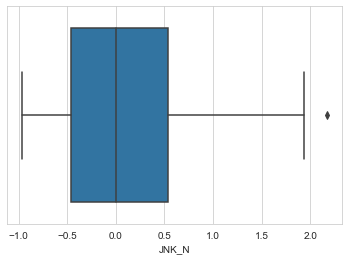

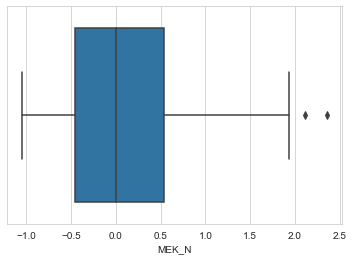

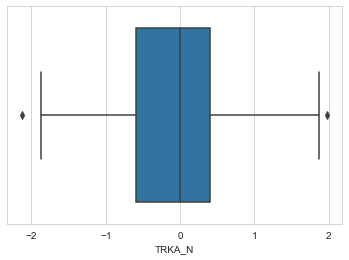

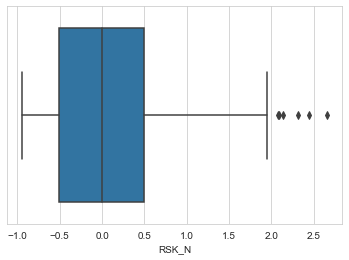

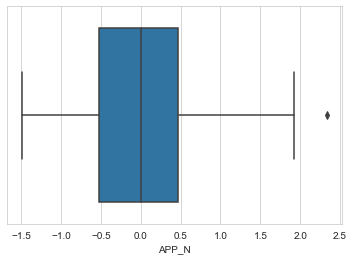

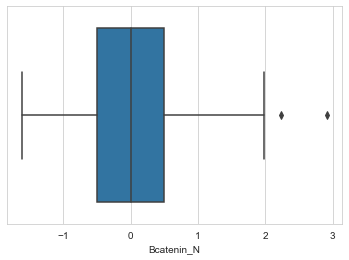

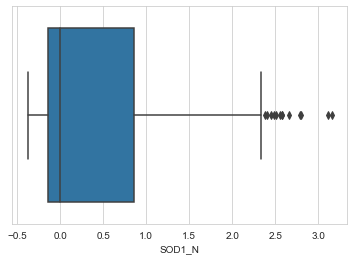

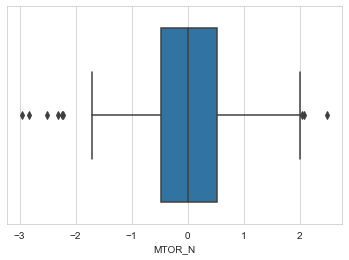

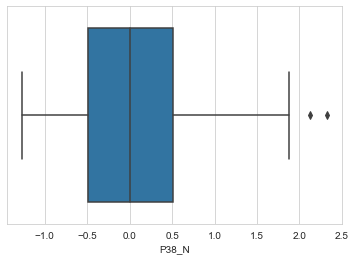

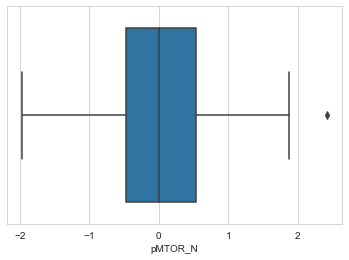

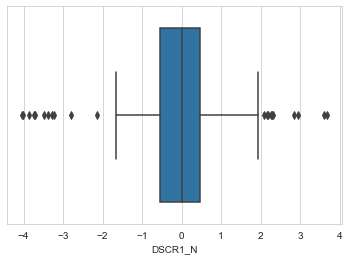

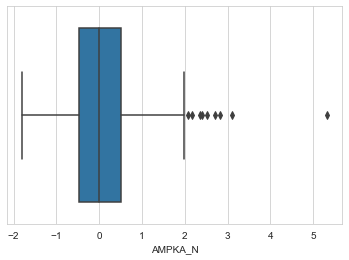

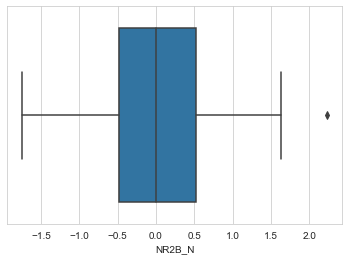

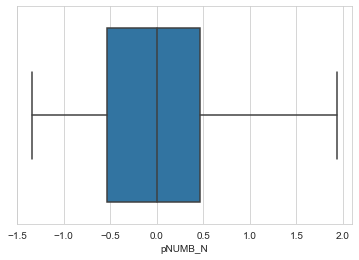

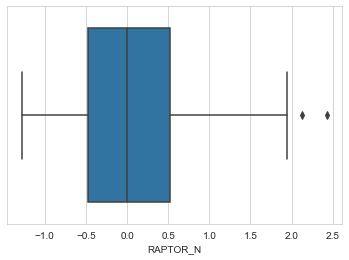

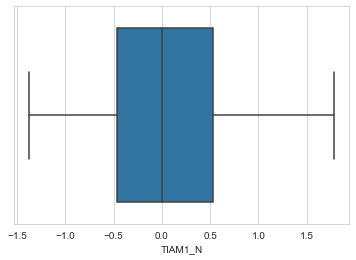

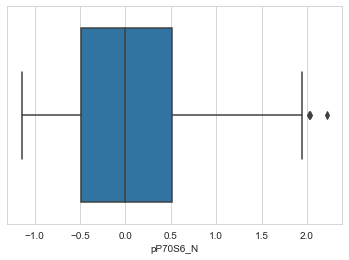

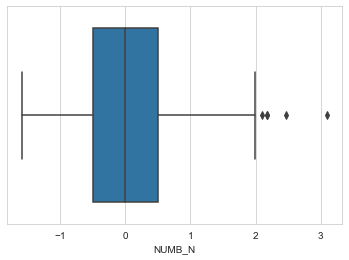

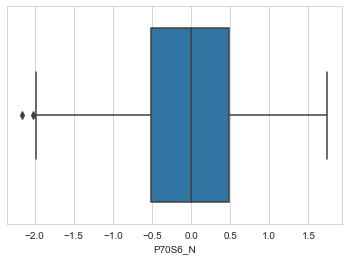

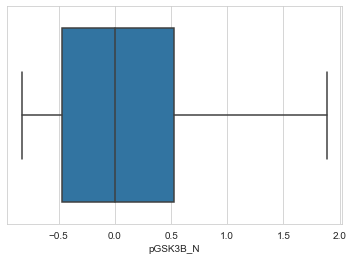

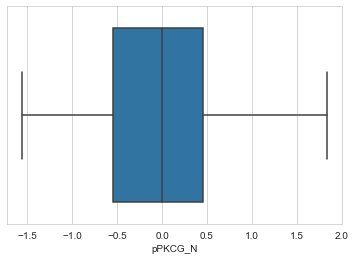

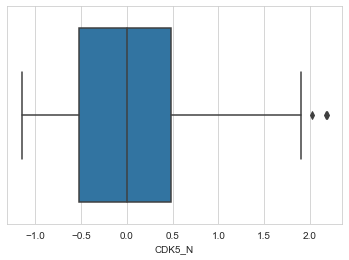

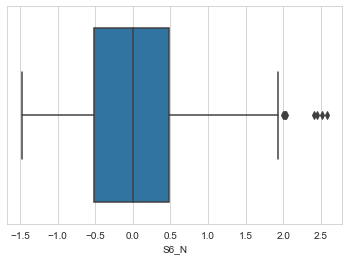

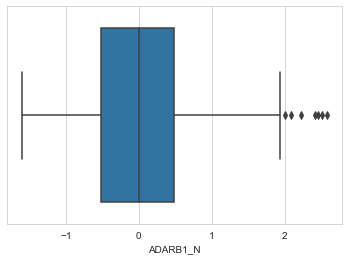

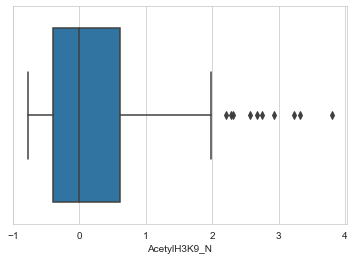

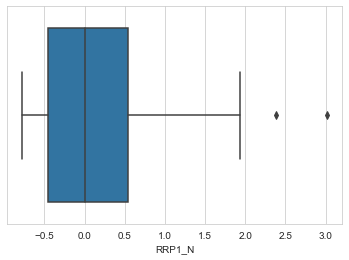

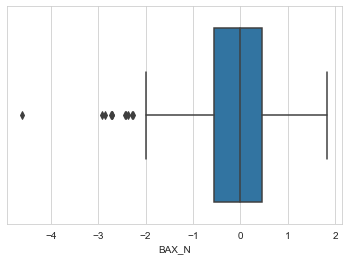

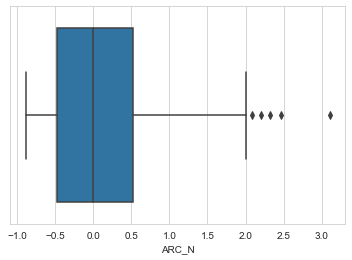

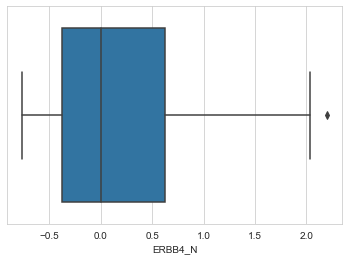

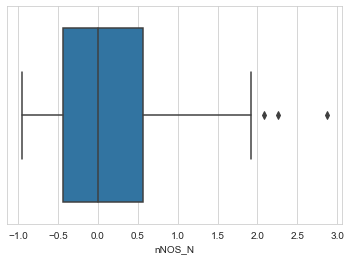

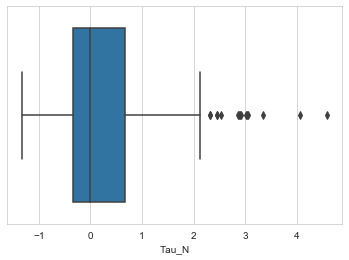

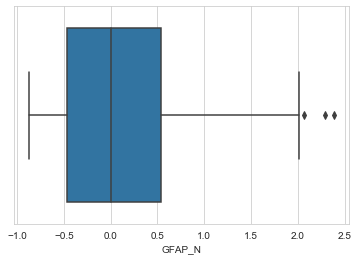

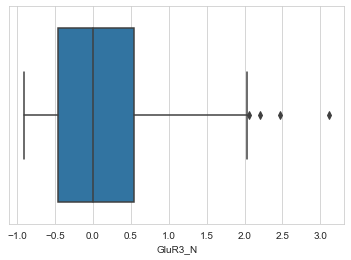

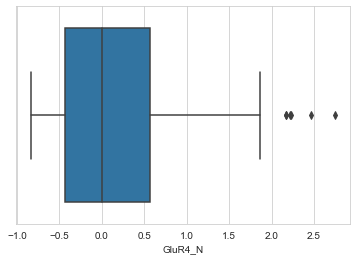

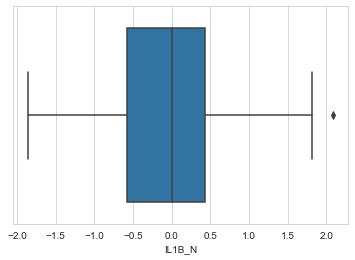

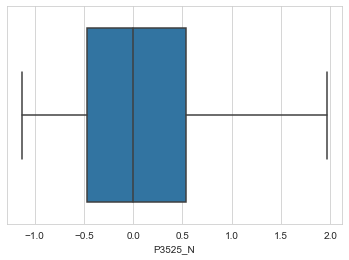

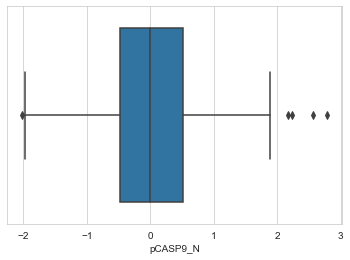

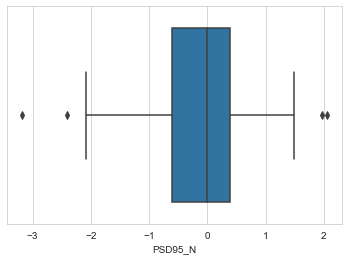

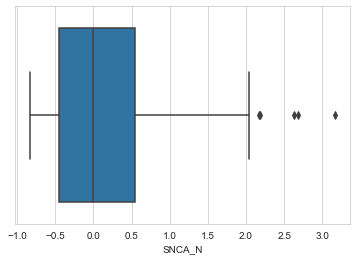

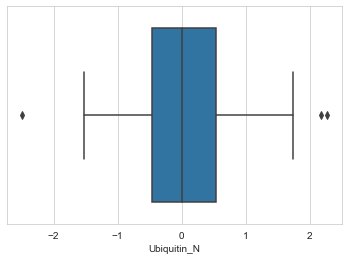

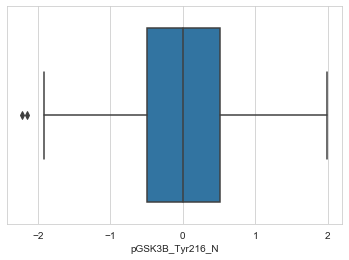

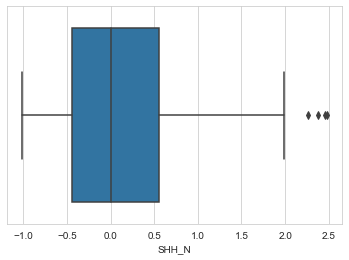

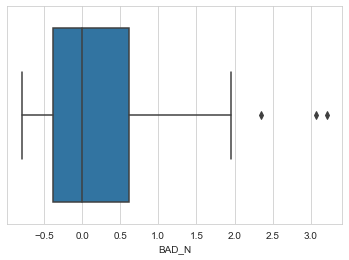

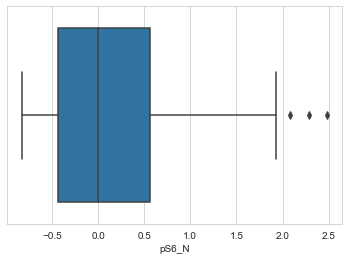

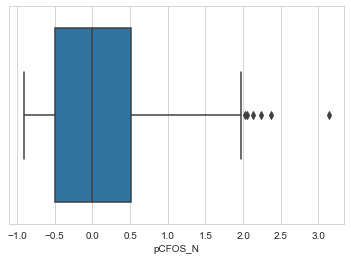

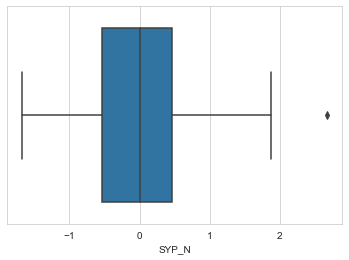

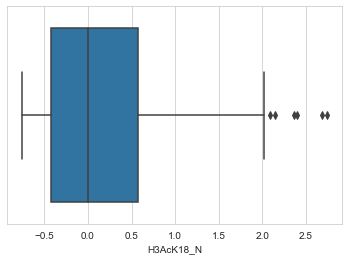

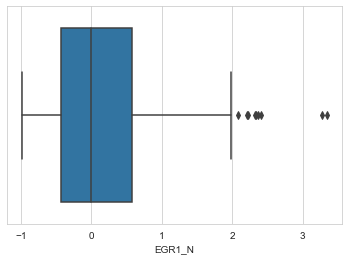

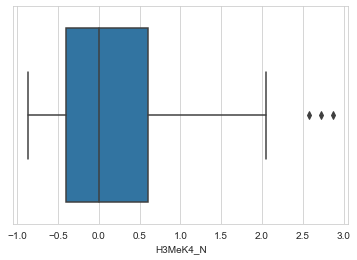

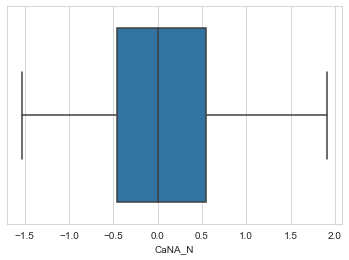

In [34]:
#REMOVING OUTLIERS
from scipy import stats 
#z = np.abs(stats.zscore(trainRG))
# z.mean()
# z.max()
# z.min()
# trainRG = trainRG[(z < 2.9).all(axis = 1)] # 2.9 3 sono buoni valori 
trainRG.shape

for column in trainRG.columns:
    sns.boxplot(x = trainRG[column])
    plt.show()
   


In [35]:
# uso il boxplot per vedere i valori che sono fuori dal range
for column in trainRG.columns:
    trainRG = trainRG[trainRG[column] < 2] # robust staler -2 2
    trainRG = trainRG[trainRG[column] > -2]
    #sns.boxplot(x = trainRG[column])
    #plt.show()
    
y = trainRG['SOD1_N']
trainRG.shape

(154, 76)

Possiamo vedere la distribuzione delle nostre features per capire quali sono le più importanti, dati con distribuzione simile a quella normale avranno sicuramente più utilità nella predizione di features 

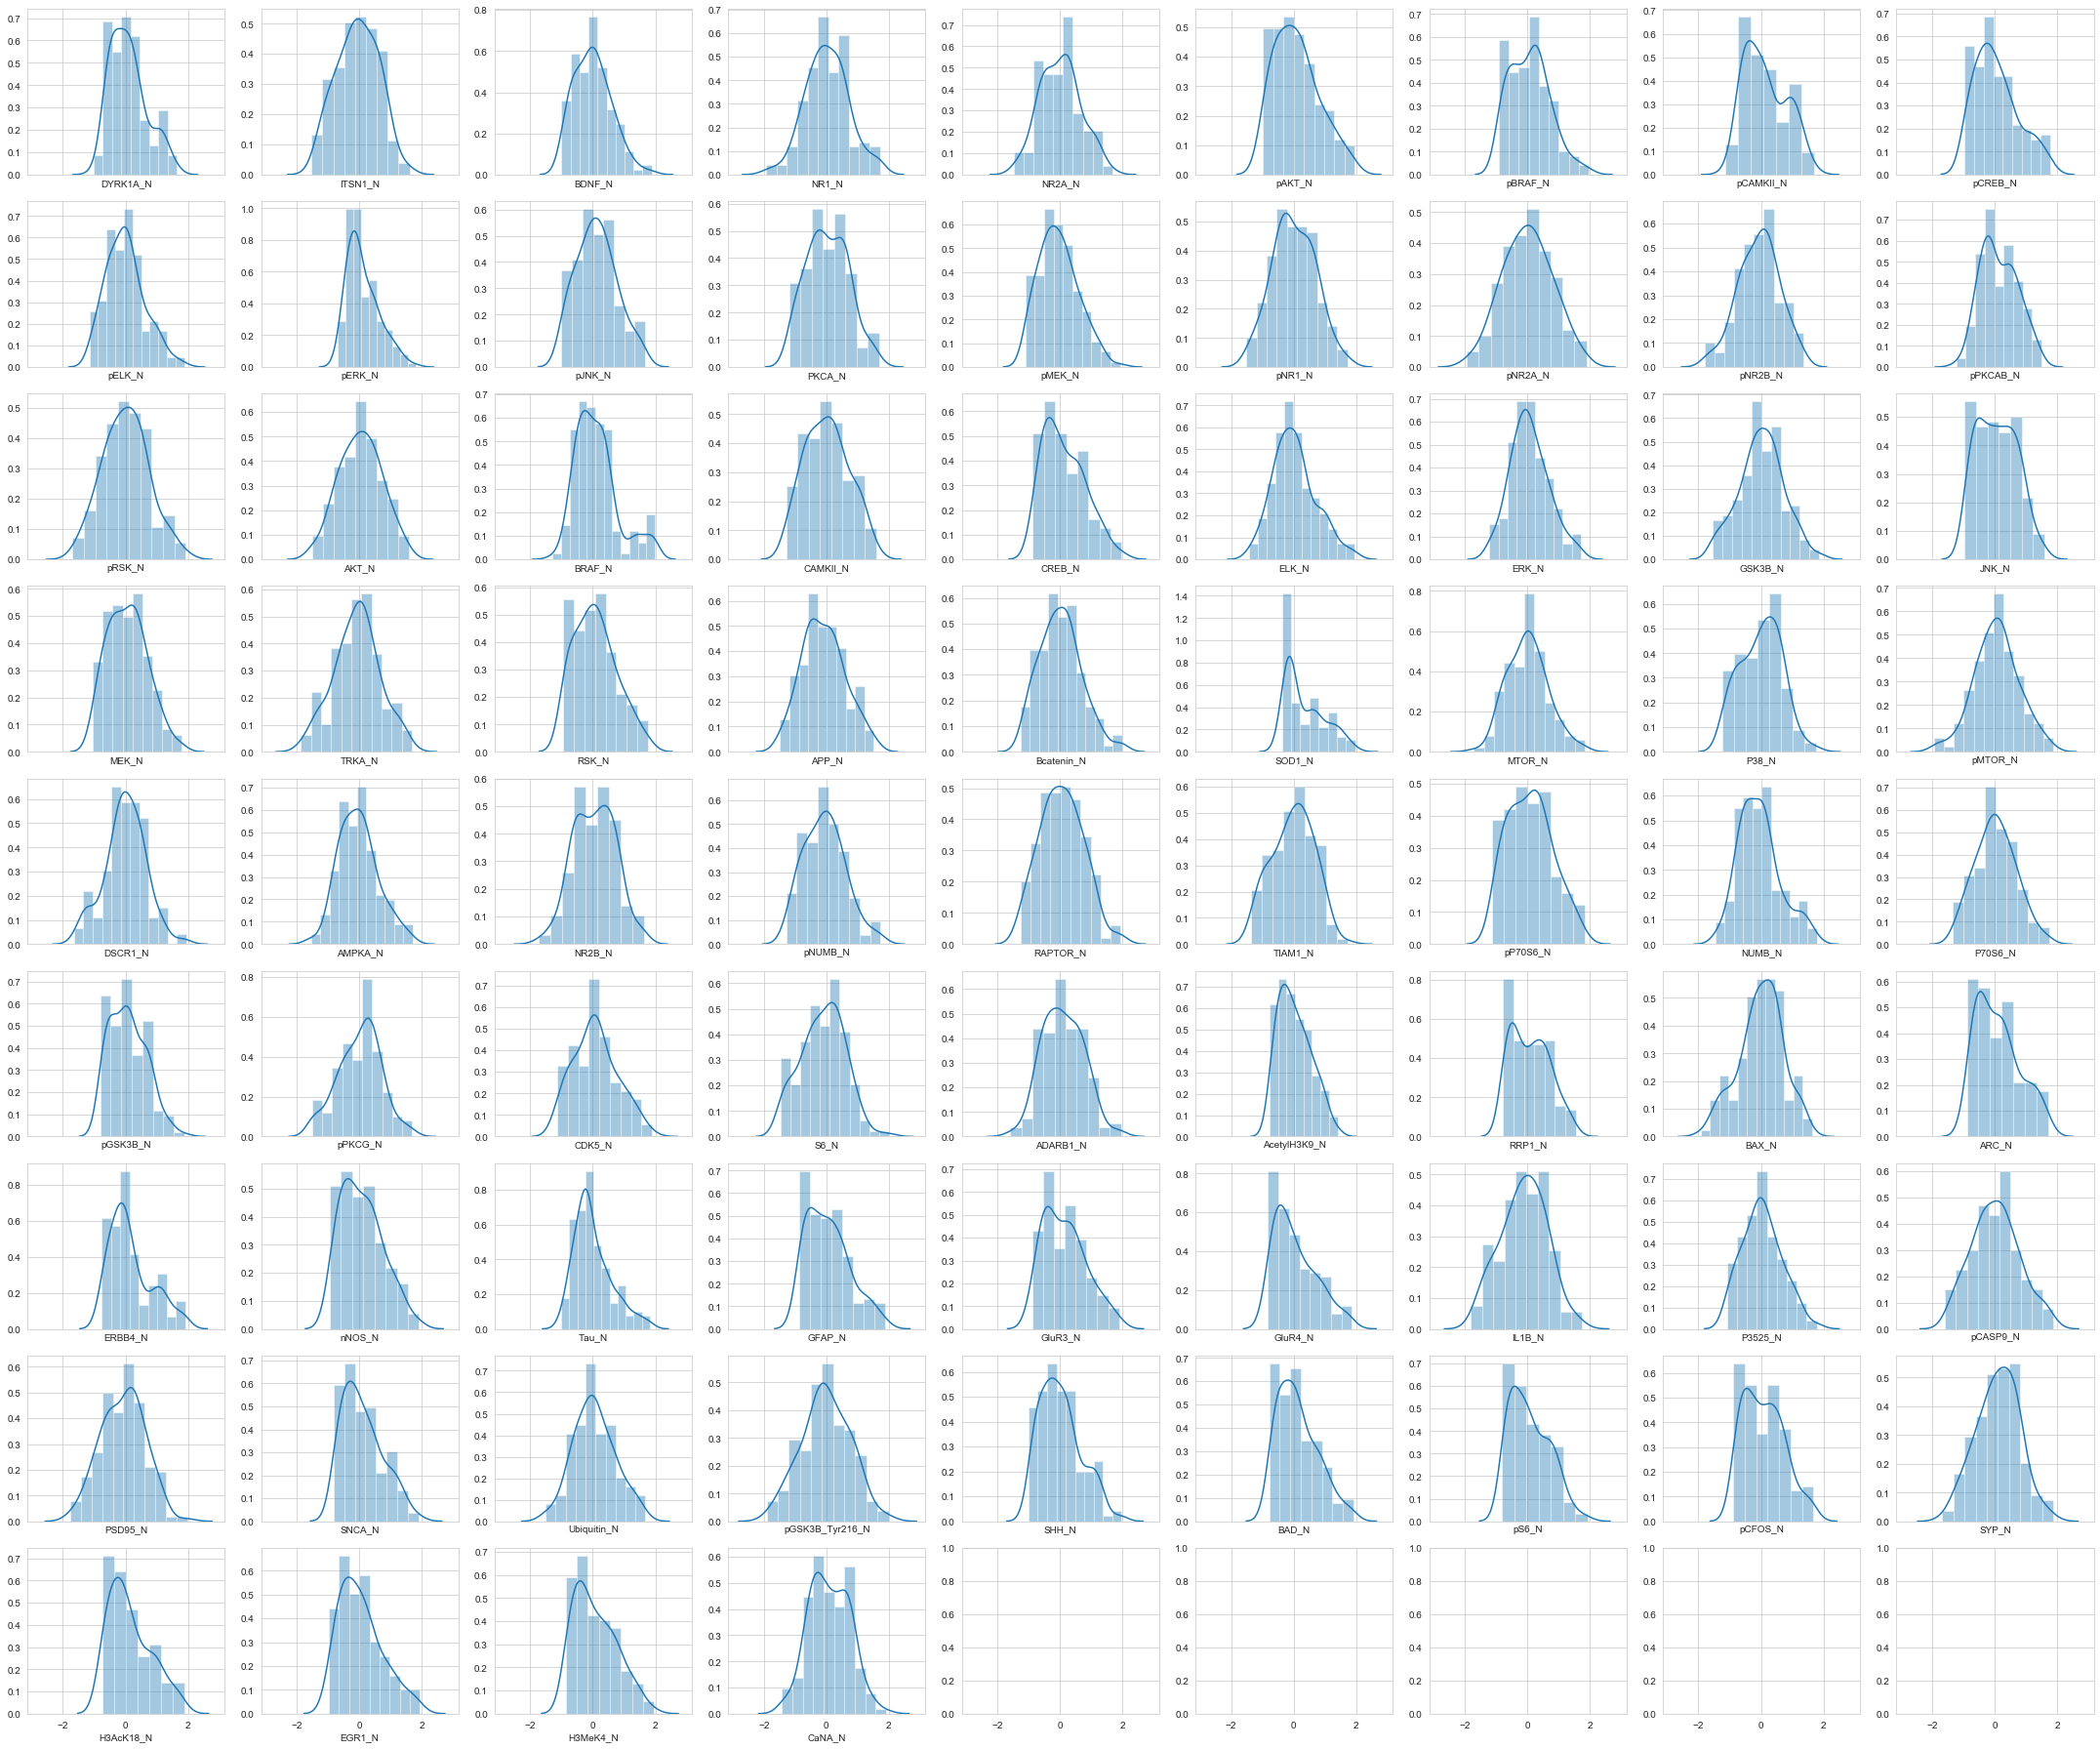

In [36]:
# Visualize the distribution of the data
def visualizza(data):
    rows = 9
    cols = 9
    f, ax = plt.subplots(rows, cols, figsize=(30, 25), sharex=True)
    col = data.columns
    index = 0
    for i in range(rows):
        for j in range(cols):
            if (index < data.shape[1]):
                sns.distplot(data[col[index]], ax = ax[i][j])
                index = index + 1
            else:
                break
    plt.tight_layout()

visualizza(trainRG)

In [37]:
corrMatReg = trainRG.corr()
# Correlation with the output variable
cor_target = abs(corrMatReg['SOD1_N']).drop('SOD1_N')
# Selecting the highly correlated features
relevant_features_2 = cor_target[cor_target > 0.605]
max(relevant_features_2)
relevant_features_2.index

0.6089446122540705

Index(['pERK_N', 'MTOR_N'], dtype='object')

Noteremo che pERK_N and BRAF_N sono molto correlate ma sono anche correlate al target quindi non conviene toglierle

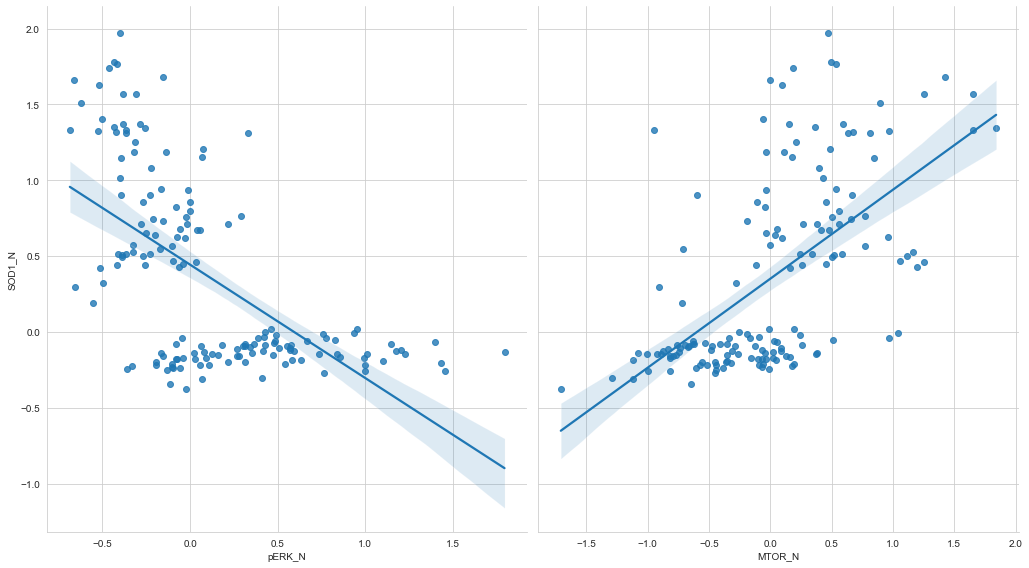

In [38]:
#f, axes = plt.subplots(9, 9, figsize=(7, 7), sharex=True)
sns.pairplot(trainRG, x_vars = relevant_features_2.index, 
             y_vars = 'SOD1_N', size = 8, aspect = .9, kind = 'reg') #, kind = 'reg'
plt.tight_layout()

In [39]:
corrMatReg = trainRG.corr()
upper = corrMatReg.where(np.triu(np.ones(corrMatReg.shape), k = 1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.78
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.85)]
to_drop
#sns.pairplot(trainRG[to_drop], diag_kind = 'hist', markers = '.', ) # , kind = 'reg'
#trainRG = trainRG.drop(columns = to_drop, axis = 1)

['pERK_N', 'BRAF_N']

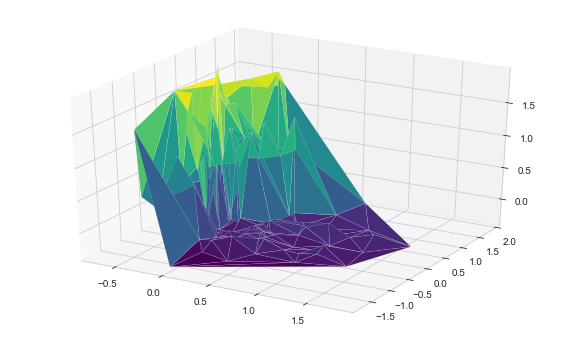

In [40]:
from matplotlib import interactive
#%matplotlib notebook 
fig = plt.figure(figsize=(10, 6))
interactive(True)
ax = fig.gca(projection='3d')
ax.plot_trisurf(trainRG['pERK_N'], trainRG['MTOR_N'], y, cmap = plt.cm.viridis, linewidth = 0.1)
plt.show()

In [41]:
trainRG = trainRG.drop(columns = 'SOD1_N', axis = 1)

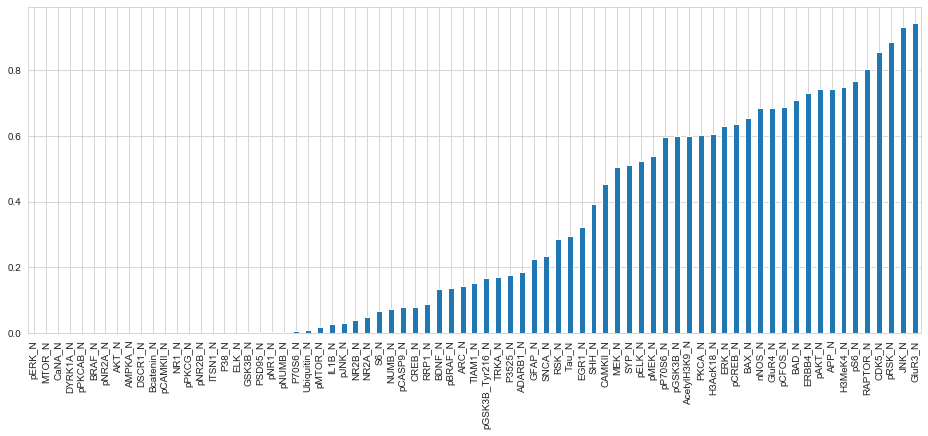

In [42]:
%matplotlib inline 
from sklearn.feature_selection import f_regression
sel = f_regression(trainRG, y)
# prima dimensione   F score
#la seconda dimensione p value delle features 
p_values = pd.Series(sel[1], name = 'p_val')
p_values.index = trainRG.columns
p_values_sort = p_values.sort_values() # potrei plottarew i p value
p_values_sort.plot.bar(figsize = (16, 6))

In [43]:
from sklearn.feature_selection import SelectKBest
selKBesst = SelectKBest(f_regression, 12).fit(trainRG, y)
X_new = selKBesst.transform(trainRG)
X_new = pd.DataFrame(X_new, columns = trainRG.columns[selKBesst.get_support()])

In [44]:
#p_values = p_values[p_values < 0.0001]
#len(p_values)
#p_values.index
#trainRG = trainRG[p_values.index]

In [45]:
#sns.pairplot(trainRG) # , kind='reg'

In [46]:
#reg = LinearRegression().fit(x_train, y_train)
#x_trainRG.shape
from sklearn.linear_model import Lasso, Ridge

x_train, x_validation, y_train, y_validation = train_test_split(X_new, y, 
                                                                test_size = 0.25)

r2_scorer = make_scorer(r2_score, greater_is_better = True)

scoreLin = cross_val_score(LinearRegression(), x_train, y_train, scoring = r2_scorer, cv = 10)
print("Regression: ", np.round(scoreLin.mean(),2))

scoreLasso = cross_val_score(Lasso(alpha = 0.001), x_train, y_train, scoring = r2_scorer, cv = 10)
print("Lasso: ", np.round(scoreLasso.mean(),2))

scoreRidge= cross_val_score(Ridge(alpha = 0.01, solver='saga'), x_train, y_train, scoring = r2_scorer, cv = 10)
print("Ridge: ", np.round(scoreRidge.mean(),2))
    
poly_int = PolynomialFeatures(degree = 2, include_bias = True, interaction_only=True).fit(x_train)
x_train_int = poly_int.transform(x_train)
x_validation_int = poly_int.transform(x_validation)

#print("X_train_small.shape", x_train.shape, " X_poly_train.shape", X_train_poly.shape)
#print("X_validation.shape", x_validation.shape, " X_poly_train.shape", X_test_poly.shape)
scorePol_int = cross_val_score(Ridge(alpha = 0.01, solver='saga'), x_train_int, y_train, scoring = r2_scorer, cv = 10)
print("Pol_inter: ", np.round(scorePol_int.mean(),2))


poly = PolynomialFeatures(degree = 2, include_bias = True, interaction_only=False).fit(x_train)
x_train_poly = poly.transform(x_train)
x_validation_poly = poly.transform(x_validation)

scorePol = cross_val_score(Ridge(alpha = 1.0, solver='saga'), x_train_poly, y_train, scoring = r2_scorer, cv = 10)
print("Pol: ", np.round(scorePol.mean(),2))

Regression:  0.65
Lasso:  0.65
Ridge:  0.65
Pol_inter:  0.51
Pol:  0.62


In [47]:
reg = LinearRegression().fit(x_train, y_train)
lasso = Lasso(alpha = 0.015).fit(x_train, y_train)
ridge = Ridge(alpha = 0.015).fit(x_train, y_train)
ply_int = LinearRegression().fit(x_train_int, y_train)
ply = LinearRegression().fit(x_train_poly, y_train)
print("Regression: ", np.round(r2_score(y_validation, reg.predict(x_validation)),2))
print("Lasso: ", np.round(r2_score(y_validation, lasso.predict(x_validation)),2))
print("Ridge: ", np.round(r2_score(y_validation, ridge.predict(x_validation)),2))
print("Poly_inter: ", np.round(r2_score(y_validation, ply_int.predict(x_validation_int)),2))
print("Poly: ", np.round(r2_score(y_validation, ply.predict(x_validation_poly)),2))

Regression:  0.46
Lasso:  0.5
Ridge:  0.46
Poly_inter:  -1.04
Poly:  -8.08


In [50]:
# NON è più questo il best 

parameters = {'alpha' : np.linspace(0.01, 1, 10000)}
clf_inter = GridSearchCV(Ridge(), parameters, n_jobs=-1)
clf_inter.fit(x_train_int, y_train)
print("Poly: ", np.round(r2_score(y_validation, clf_inter.best_estimator_.predict(x_validation_int)),2))

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.01      , 0.01009901, 0.01019802, ..., 0.99980198, 0.99990099,
       1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Poly:  0.46


In [49]:
clf_inter.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)